In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("train.csv")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df["datetime"] = df["datetime"].astype("datetime64")

In [ ]:
df["hour"] = df["datetime"].dt.hour
df["day"] = df["datetime"].dt.day
df["month"] = df["datetime"].dt.month
df["year"] = df["datetime"].dt.year

In [ ]:
df.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,1,1,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,1,1,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2,1,1,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3,1,1,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4,1,1,2011
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,5,1,1,2011
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,6,1,1,2011
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,7,1,1,2011
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,8,1,1,2011
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14,9,1,1,2011


In [ ]:
df = df.drop(["datetime"], axis=1)

In [ ]:
y = df["count"]
X = df.drop(["count"],axis=1)

In [ ]:
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,year
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,1,1,2011
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,1,1,2011
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2,1,1,2011
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3,1,1,2011
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4,1,1,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19,19,12,2012
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20,19,12,2012
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21,19,12,2012
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,22,19,12,2012


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=64)

In [ ]:
data = (X_train - X_train.mean())/X_train.std()
y.head()

0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [ ]:
X_train

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,hour,day,month,year
8960,3,0,1,1,30.34,34.090,55,19.0012,102,749,17,15,8,2012
8066,2,0,0,1,27.06,31.060,39,11.0014,213,353,11,16,6,2012
6089,1,0,1,2,12.30,16.665,52,0.0000,9,75,23,9,2,2012
7678,2,0,0,1,18.86,22.725,67,7.0015,28,67,7,19,5,2012
10494,4,0,1,1,24.60,31.060,53,8.9981,45,397,16,3,12,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,1,0,1,1,6.56,6.820,43,26.0027,7,81,9,3,1,2011
3238,3,0,1,2,28.70,33.335,74,12.9980,41,245,20,4,8,2011
6263,1,0,1,2,11.48,13.635,93,11.0014,0,16,5,17,2,2012
5094,4,0,1,2,18.86,22.725,94,12.9980,13,401,8,6,12,2011


In [ ]:
model = Sequential()
model.add(Dense(16, activation="linear"))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam")

In [ ]:
history = model.fit(X_train,y_train, validation_split=0.3, epochs = 10, verbose = 1)

Epoch 1/10
167/167 [==============================] - 1s 3ms/step - loss: 95514.1953 - val_loss: 7385.5977
Epoch 2/10
167/167 [==============================] - 0s 2ms/step - loss: 5189.9150 - val_loss: 3051.7681
Epoch 3/10
167/167 [==============================] - 0s 2ms/step - loss: 2054.9929 - val_loss: 1219.9966
Epoch 4/10
167/167 [==============================] - 0s 2ms/step - loss: 903.1296 - val_loss: 645.0903
Epoch 5/10
167/167 [==============================] - 0s 2ms/step - loss: 517.7309 - val_loss: 411.9831
Epoch 6/10
167/167 [==============================] - 0s 2ms/step - loss: 339.2052 - val_loss: 277.9497
Epoch 7/10
167/167 [==============================] - 0s 2ms/step - loss: 233.9857 - val_loss: 194.5442
Epoch 8/10
167/167 [==============================] - 0s 2ms/step - loss: 166.9967 - val_loss: 141.6810
Epoch 9/10
167/167 [==============================] - 0s 2ms/step - loss: 124.8830 - val_loss: 108.3662
Epoch 10/10
167/167 [==============================] - 0s

In [ ]:
model.predict(X_test)

array([[598.69    ],
       [ 30.405014],
       [276.42892 ],
       ...,
       [396.4092  ],
       [ 22.461739],
       [150.11246 ]], dtype=float32)

In [ ]:
model.evaluate(X_test,y_test)

103/103 [==============================] - 0s 1ms/step - loss: 87.8572


87.85719299316406

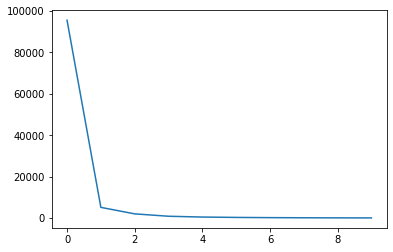

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.show()